In [2]:
# Load the Dataset and Convert It into a Table

import pandas as pd # Import pandas for data manipulation

# Load the dataset from the uploaded CSV file
df = pd.read_csv('/content/bank-additional.csv', header=None, skiprows=1)

# Split the data into separate columns based on the delimiter (semicolon in this case)
df_split = df[0].str.split(';', expand=True)

# Display the first few rows to verify the split
df_split.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
1,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
2,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
3,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
4,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",...,1,999,0,"""nonexistent""",-0.1,93.2,-42,4.191,5195.8,"""no"""


In [3]:
# Assign Column Names

# Assign column names
df_split.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                    'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

# Verify the updated DataFrame
df_split.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,"""blue-collar""","""married""","""basic.9y""","""no""","""yes""","""no""","""cellular""","""may""","""fri""",...,2,999,0,"""nonexistent""",-1.8,92.893,-46.2,1.313,5099.1,"""no"""
1,39,"""services""","""single""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""fri""",...,4,999,0,"""nonexistent""",1.1,93.994,-36.4,4.855,5191,"""no"""
2,25,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""jun""","""wed""",...,1,999,0,"""nonexistent""",1.4,94.465,-41.8,4.962,5228.1,"""no"""
3,38,"""services""","""married""","""basic.9y""","""no""","""unknown""","""unknown""","""telephone""","""jun""","""fri""",...,3,999,0,"""nonexistent""",1.4,94.465,-41.8,4.959,5228.1,"""no"""
4,47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""mon""",...,1,999,0,"""nonexistent""",-0.1,93.2,-42,4.191,5195.8,"""no"""


In [4]:
# Convert Categorical Variables to Numeric Values

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                    'day_of_week', 'poutcome', 'y']

# Apply label encoding to categorical columns
for col in categorical_cols:
    df_split[col] = label_encoder.fit_transform(df_split[col])

# Display the transformed DataFrame
df_split.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.2,-42,4.191,5195.8,0


In [5]:
# Explore the Dataset

# Check for missing values
print("Missing values in each column:")
print(df_split.isnull().sum())

# Check the data types of each column
print("\nData types of each column:")
print(df_split.dtypes)

# Get a summary of the dataset (count, mean, std, min, max, etc.)
print("\nSummary statistics of the dataset:")
print(df_split.describe())

# Check class distribution of target variable (y)
print("\nClass distribution of target variable (y):")
print(df_split['y'].value_counts())

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types of each column:
age               object
job                int64
marital            int64
education          int64
default            int64
housing            int64
loan               int64
contact            int64
month              int64
day_of_week        int64
duration          object
campaign          object
pdays             object
previous          object
poutcome           int64
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y       

In [6]:
#  Data Preparation (Preprocessing)

# Check if there are any missing values
# If missing values exist, you can fill or drop them (but as per your case, it looks clean)
# We will proceed with splitting the dataset.

from sklearn.model_selection import train_test_split

# Define the feature columns (X) and target column (y)
X = df_split.drop(columns=['y'])
y = df_split['y']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (3295, 20)
Test data shape: (824, 20)



Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       732
           1       0.54      0.38      0.45        92

    accuracy                           0.89       824
   macro avg       0.73      0.67      0.69       824
weighted avg       0.88      0.89      0.89       824



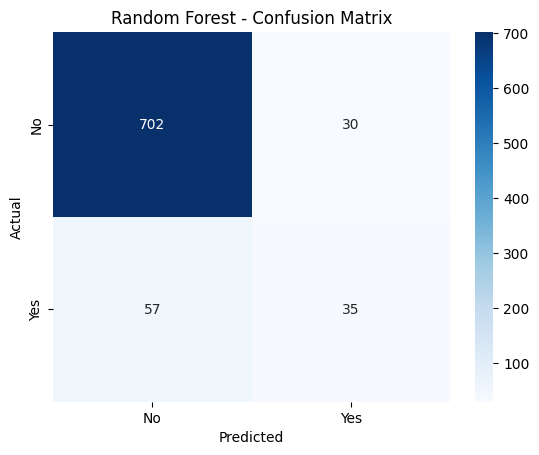

In [7]:
# Choosing Machine Learning Models

# a. Random Forest Classification Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Neural Network - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.88       732
           1       0.36      0.86      0.51        92

    accuracy                           0.81       824
   macro avg       0.67      0.83      0.70       824
weighted avg       0.91      0.81      0.84       824



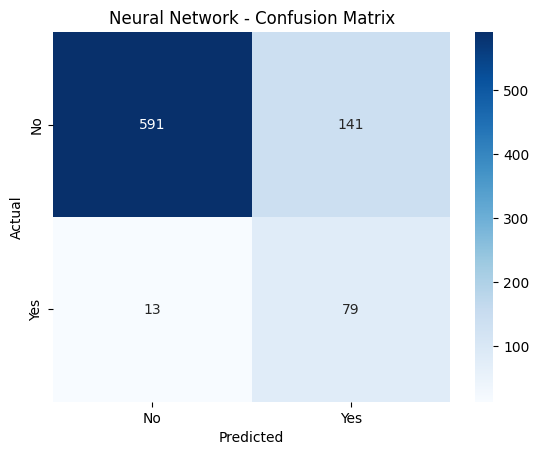

In [8]:
# b. Neural Network Classification Model

from sklearn.neural_network import MLPClassifier

# Initialize and train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model performance
print("\nNeural Network - Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Confusion Matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# Compare Results

# Compare the accuracy of both models
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print(f"Neural Network Accuracy: {accuracy_nn:.4f}")

# You can also compare other metrics using classification_report or manually print each metric


Random Forest Accuracy: 0.8944
Neural Network Accuracy: 0.8131


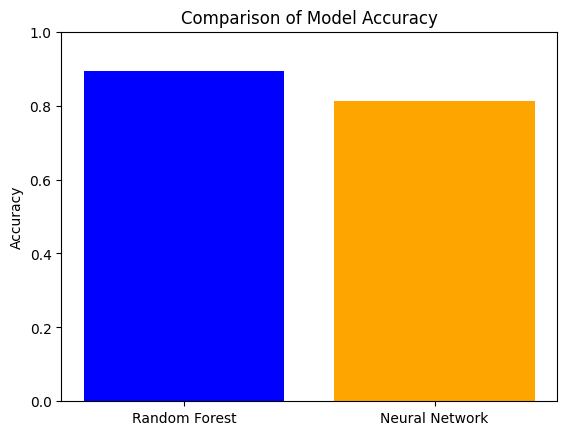

In [10]:
# Visualize Results

# Bar chart comparison of accuracy
metrics = ['Random Forest', 'Neural Network']
accuracy = [accuracy_rf, accuracy_nn]

plt.bar(metrics, accuracy, color=['blue', 'orange'])
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [11]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification reports as dictionaries for both models
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Convert the dictionaries to DataFrames for better visualization
df_metrics_rf = pd.DataFrame(report_rf).transpose()
df_metrics_nn = pd.DataFrame(report_nn).transpose()

print("\nRandom Forest Metrics:")
print(df_metrics_rf)

print("\nNeural Network Metrics:")
print(df_metrics_nn)


Random Forest Metrics:
              precision    recall  f1-score     support
0              0.924901  0.959016  0.941650  732.000000
1              0.538462  0.380435  0.445860   92.000000
accuracy       0.894417  0.894417  0.894417    0.894417
macro avg      0.731681  0.669726  0.693755  824.000000
weighted avg   0.881755  0.894417  0.886295  824.000000

Neural Network Metrics:
              precision    recall  f1-score     support
0              0.978477  0.807377  0.884731  732.000000
1              0.359091  0.858696  0.506410   92.000000
accuracy       0.813107  0.813107  0.813107    0.813107
macro avg      0.668784  0.833036  0.695570  824.000000
weighted avg   0.909322  0.813107  0.842491  824.000000


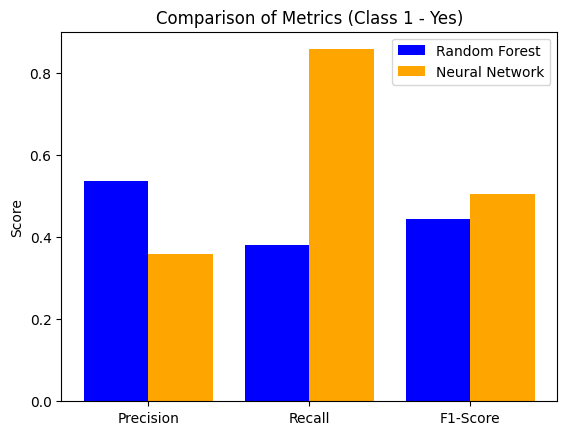

In [12]:
import matplotlib.pyplot as plt

# Metrics for comparison
metrics = ['Precision', 'Recall', 'F1-Score']
rf_values = [df_metrics_rf.loc['1', 'precision'], df_metrics_rf.loc['1', 'recall'], df_metrics_rf.loc['1', 'f1-score']]
nn_values = [df_metrics_nn.loc['1', 'precision'], df_metrics_nn.loc['1', 'recall'], df_metrics_nn.loc['1', 'f1-score']]

# Plot bar chart for comparison
x = range(len(metrics))
plt.bar(x, rf_values, width=0.4, label='Random Forest', color='blue', align='center')
plt.bar([p + 0.4 for p in x], nn_values, width=0.4, label='Neural Network', color='orange', align='center')

plt.xticks([p + 0.2 for p in x], metrics)
plt.ylabel('Score')
plt.title('Comparison of Metrics (Class 1 - Yes)')
plt.legend()
plt.show()